## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  98.290832  1631.316273  0.076999  2.376578   159.328550
1  49.302336  1075.897165  0.939363  3.760014  1011.825028
2  17.829345   397.816569  0.392539  4.802603   157.165935
3  51.198239   813.453659  0.355744  4.758167   293.879514
4  59.358584   959.838808  0.591188  1.868253   570.366391


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9992249	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.9901690	total: 65.8ms	remaining: 32.8s
2:	learn: 0.9812224	total: 66.1ms	remaining: 22s
3:	learn: 0.9724808	total: 66.6ms	remaining: 16.6s
4:	learn: 0.9598797	total: 66.9ms	remaining: 13.3s
5:	learn: 0.9519023	total: 67.5ms	remaining: 11.2s
6:	learn: 0.9408506	total: 67.9ms	remaining: 9.63s
7:	learn: 0.9297704	total: 68.3ms	remaining: 8.46s
8:	learn: 0.9193778	total: 68.6ms	remaining: 7.55s
9:	learn: 0.9090595	total: 68.9ms	remaining: 6.82s
10:	learn: 0.9007775	total: 69.3ms	remaining: 6.23s
11:	learn: 0.8871816	total: 69.6ms	remaining: 5.73s
12:	learn: 0.8760674	total: 69.8ms	remaining: 5.3s
13:	learn: 0.8651224	total: 70.1ms	remaining: 4.94s
14:	learn: 0.8553877	total: 70.4ms	remaining: 4.62s
15:	learn: 0.8459373	total: 75.4ms	remaining: 4.64s
16:	learn: 0.8355101	total: 75.7ms	remaining: 4.38s
17:	learn: 0.8288683	total: 75.9ms	remaining: 4.14s
18:	learn: 0.8215342	total: 76.2ms	remaining: 3

45:	learn: 0.6042966	total: 87.5ms	remaining: 1.81s
46:	learn: 0.5975791	total: 88ms	remaining: 1.78s
47:	learn: 0.5917336	total: 88.3ms	remaining: 1.75s
48:	learn: 0.5865760	total: 88.6ms	remaining: 1.72s
49:	learn: 0.5817179	total: 89ms	remaining: 1.69s
50:	learn: 0.5758649	total: 89.4ms	remaining: 1.66s
51:	learn: 0.5691981	total: 89.9ms	remaining: 1.64s
52:	learn: 0.5628100	total: 90.3ms	remaining: 1.61s
53:	learn: 0.5547015	total: 90.7ms	remaining: 1.59s
54:	learn: 0.5495473	total: 91.1ms	remaining: 1.56s
55:	learn: 0.5458909	total: 91.5ms	remaining: 1.54s
56:	learn: 0.5398493	total: 91.9ms	remaining: 1.52s
57:	learn: 0.5328534	total: 92.4ms	remaining: 1.5s
58:	learn: 0.5255973	total: 92.9ms	remaining: 1.48s
59:	learn: 0.5194637	total: 93.4ms	remaining: 1.46s
60:	learn: 0.5132649	total: 93.8ms	remaining: 1.44s
61:	learn: 0.5076987	total: 94.2ms	remaining: 1.43s
62:	learn: 0.5030609	total: 94.9ms	remaining: 1.41s
63:	learn: 0.4959947	total: 95.3ms	remaining: 1.39s
64:	learn: 0.4913

245:	learn: 0.0881060	total: 182ms	remaining: 558ms
246:	learn: 0.0872982	total: 183ms	remaining: 556ms
247:	learn: 0.0866092	total: 183ms	remaining: 555ms
248:	learn: 0.0858034	total: 183ms	remaining: 553ms
249:	learn: 0.0853961	total: 184ms	remaining: 551ms
250:	learn: 0.0849664	total: 184ms	remaining: 550ms
251:	learn: 0.0842000	total: 185ms	remaining: 548ms
252:	learn: 0.0836727	total: 185ms	remaining: 546ms
253:	learn: 0.0829852	total: 185ms	remaining: 544ms
254:	learn: 0.0822627	total: 186ms	remaining: 542ms
255:	learn: 0.0815558	total: 186ms	remaining: 541ms
256:	learn: 0.0809751	total: 186ms	remaining: 539ms
257:	learn: 0.0803436	total: 187ms	remaining: 537ms
258:	learn: 0.0797682	total: 187ms	remaining: 536ms
259:	learn: 0.0792422	total: 188ms	remaining: 534ms
260:	learn: 0.0786125	total: 188ms	remaining: 533ms
261:	learn: 0.0779556	total: 189ms	remaining: 531ms
262:	learn: 0.0773304	total: 189ms	remaining: 529ms
263:	learn: 0.0767831	total: 189ms	remaining: 528ms
264:	learn: 

450:	learn: 0.0215703	total: 265ms	remaining: 323ms
451:	learn: 0.0214466	total: 266ms	remaining: 322ms
452:	learn: 0.0213334	total: 266ms	remaining: 322ms
453:	learn: 0.0212234	total: 267ms	remaining: 321ms
454:	learn: 0.0210935	total: 267ms	remaining: 320ms
455:	learn: 0.0209836	total: 267ms	remaining: 319ms
456:	learn: 0.0209000	total: 269ms	remaining: 319ms
457:	learn: 0.0207943	total: 269ms	remaining: 318ms
458:	learn: 0.0206668	total: 269ms	remaining: 318ms
459:	learn: 0.0205688	total: 270ms	remaining: 317ms
460:	learn: 0.0204441	total: 270ms	remaining: 316ms
461:	learn: 0.0203289	total: 271ms	remaining: 315ms
462:	learn: 0.0202336	total: 271ms	remaining: 314ms
463:	learn: 0.0201124	total: 272ms	remaining: 314ms
464:	learn: 0.0199935	total: 272ms	remaining: 313ms
465:	learn: 0.0198767	total: 272ms	remaining: 312ms
466:	learn: 0.0197621	total: 273ms	remaining: 311ms
467:	learn: 0.0196497	total: 273ms	remaining: 311ms
468:	learn: 0.0195589	total: 274ms	remaining: 310ms
469:	learn: 

671:	learn: 0.0092182	total: 360ms	remaining: 176ms
672:	learn: 0.0091792	total: 361ms	remaining: 175ms
673:	learn: 0.0091334	total: 361ms	remaining: 175ms
674:	learn: 0.0091067	total: 362ms	remaining: 174ms
675:	learn: 0.0090736	total: 362ms	remaining: 174ms
676:	learn: 0.0090506	total: 363ms	remaining: 173ms
677:	learn: 0.0090283	total: 363ms	remaining: 173ms
678:	learn: 0.0090025	total: 364ms	remaining: 172ms
679:	learn: 0.0089703	total: 364ms	remaining: 171ms
680:	learn: 0.0089606	total: 365ms	remaining: 171ms
681:	learn: 0.0089391	total: 365ms	remaining: 170ms
682:	learn: 0.0088983	total: 366ms	remaining: 170ms
683:	learn: 0.0088585	total: 366ms	remaining: 169ms
684:	learn: 0.0088224	total: 366ms	remaining: 169ms
685:	learn: 0.0087797	total: 367ms	remaining: 168ms
686:	learn: 0.0087490	total: 367ms	remaining: 167ms
687:	learn: 0.0087193	total: 368ms	remaining: 167ms
688:	learn: 0.0086955	total: 368ms	remaining: 166ms
689:	learn: 0.0086544	total: 368ms	remaining: 166ms
690:	learn: 

864:	learn: 0.0053948	total: 448ms	remaining: 69.9ms
865:	learn: 0.0053785	total: 448ms	remaining: 69.3ms
866:	learn: 0.0053691	total: 448ms	remaining: 68.8ms
867:	learn: 0.0053659	total: 449ms	remaining: 68.3ms
868:	learn: 0.0053393	total: 449ms	remaining: 67.7ms
869:	learn: 0.0053302	total: 450ms	remaining: 67.2ms
870:	learn: 0.0053142	total: 450ms	remaining: 66.7ms
871:	learn: 0.0053052	total: 451ms	remaining: 66.1ms
872:	learn: 0.0052996	total: 451ms	remaining: 65.6ms
873:	learn: 0.0052845	total: 451ms	remaining: 65.1ms
874:	learn: 0.0052801	total: 452ms	remaining: 64.6ms
875:	learn: 0.0052712	total: 452ms	remaining: 64ms
876:	learn: 0.0052564	total: 453ms	remaining: 63.5ms
877:	learn: 0.0052460	total: 453ms	remaining: 63ms
878:	learn: 0.0052260	total: 454ms	remaining: 62.5ms
879:	learn: 0.0052063	total: 454ms	remaining: 61.9ms
880:	learn: 0.0051870	total: 455ms	remaining: 61.4ms
881:	learn: 0.0051680	total: 455ms	remaining: 60.9ms
882:	learn: 0.0051493	total: 455ms	remaining: 60.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

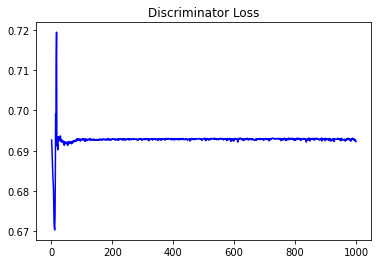

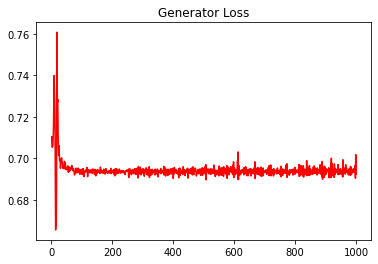

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.002293102853146687


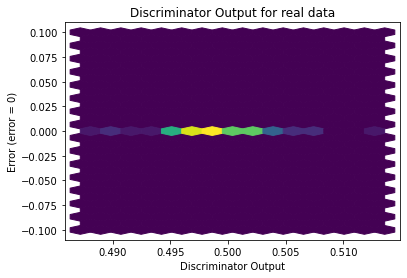

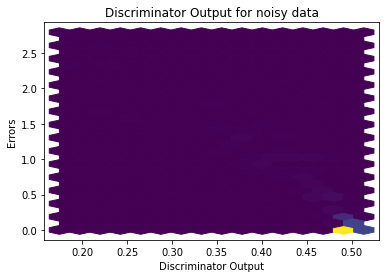

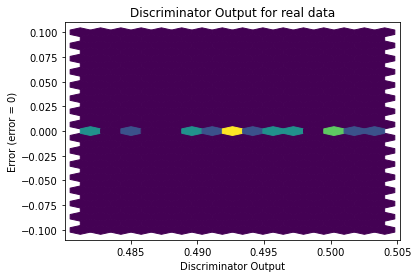

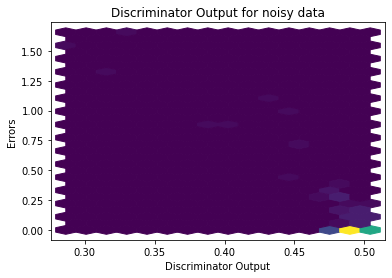

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


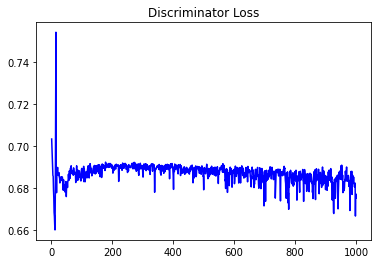

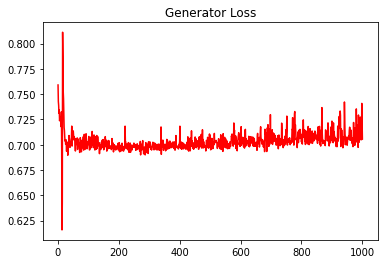

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004373097852761759


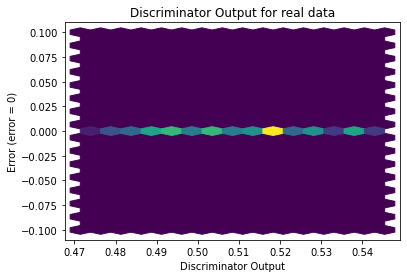

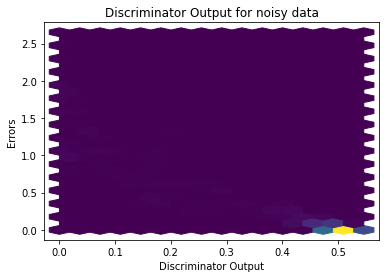

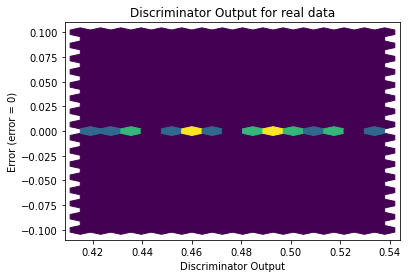

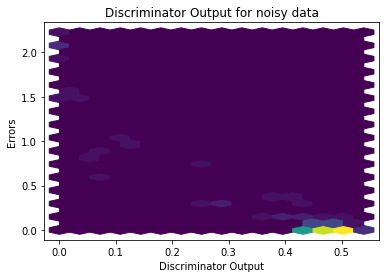

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1179]], requires_grad=True)
